### importing necessary libraries 

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix
import scikitplot as skl
import warnings
warnings.filterwarnings('ignore')
sns.set()


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

it seems there are no missing values in our data. Great let's see the distribution

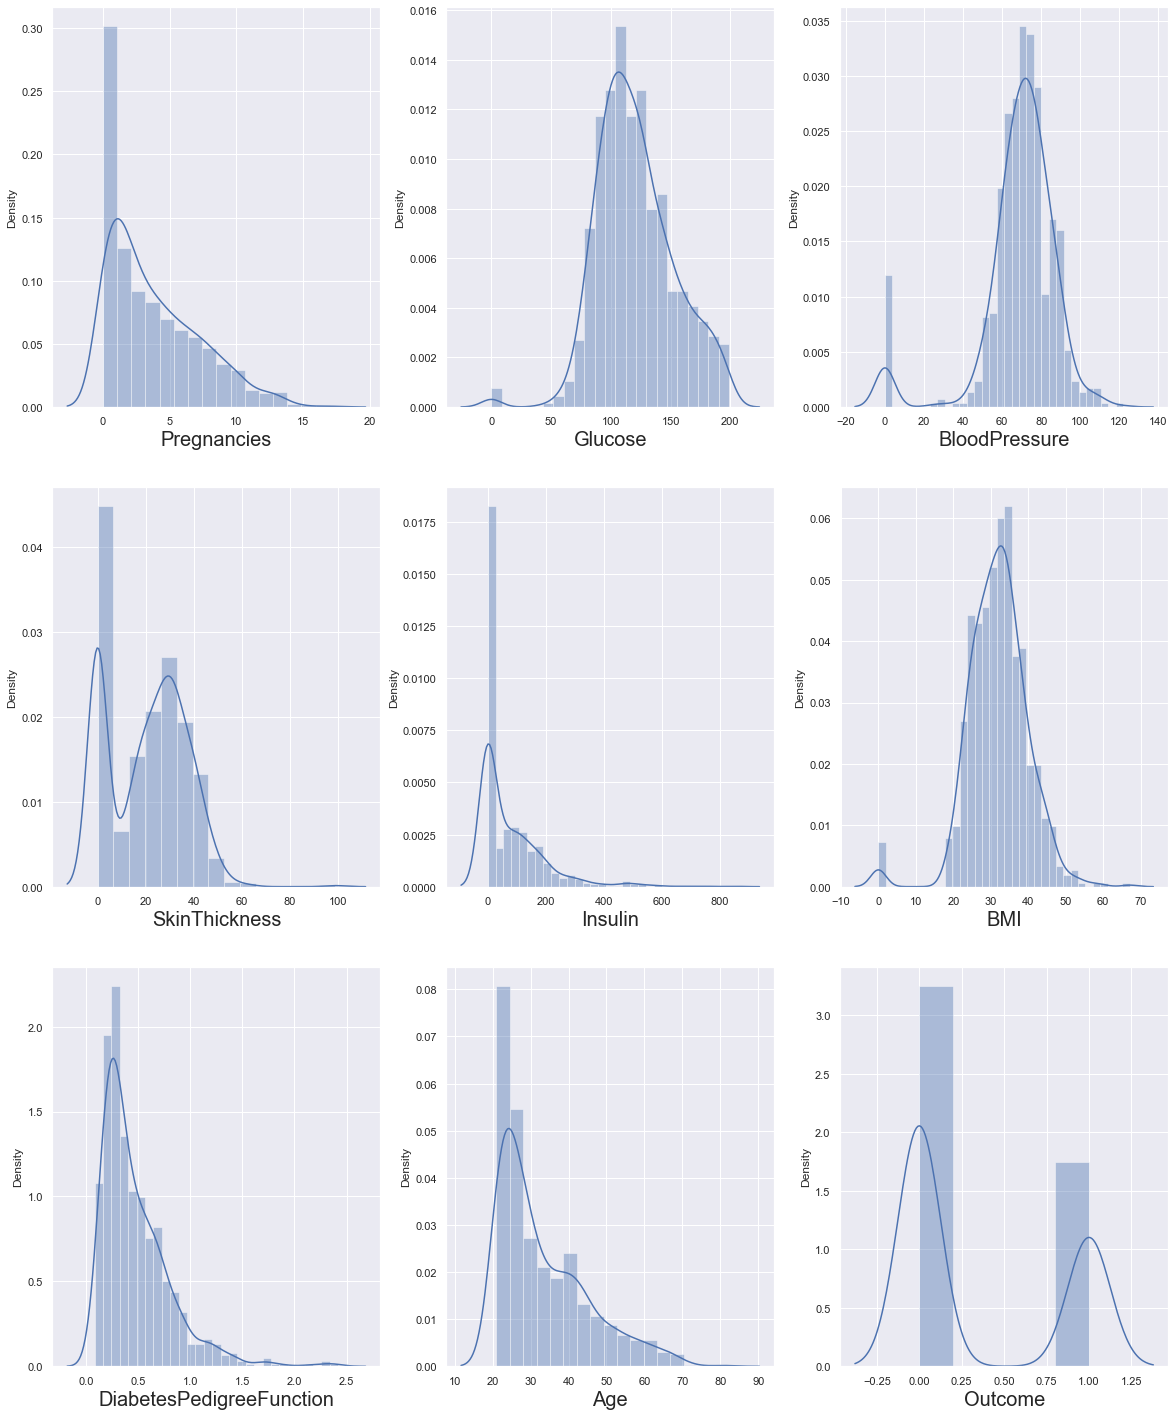

In [8]:
# lets see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 9:   # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.show()
        

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [9]:
# replacing 0 values with the mean of the column
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data["BloodPressure"] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

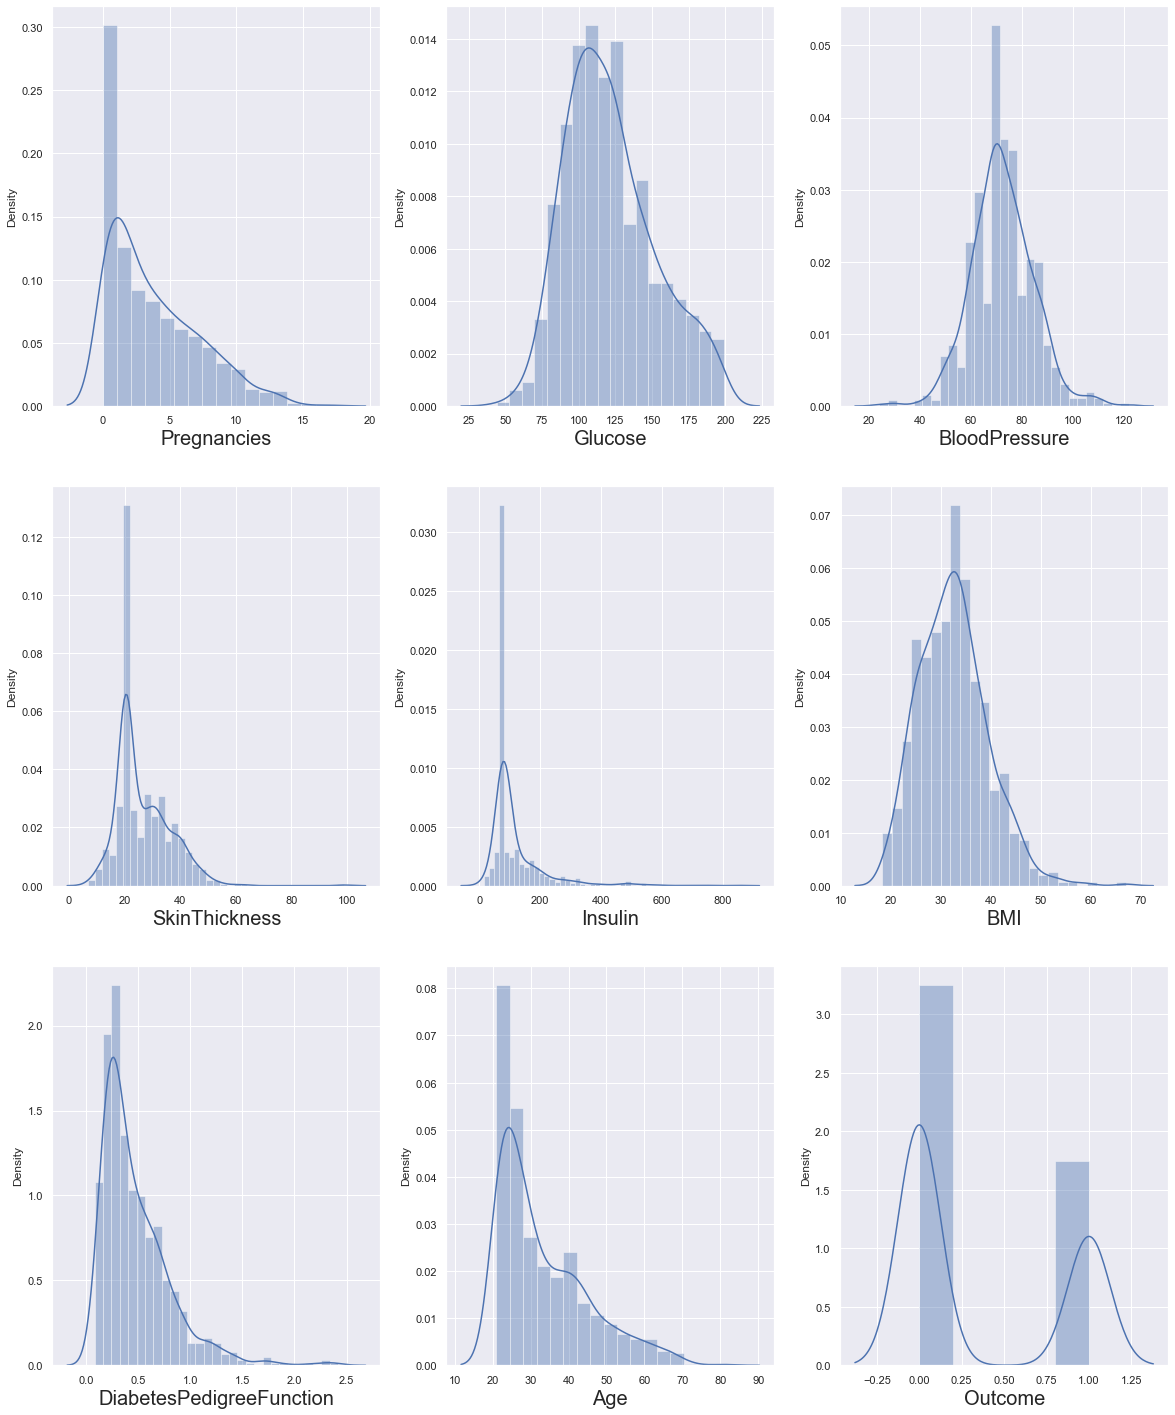

In [10]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 9:   # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.show()
        

Now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns. Let's deal with them.

<AxesSubplot:>

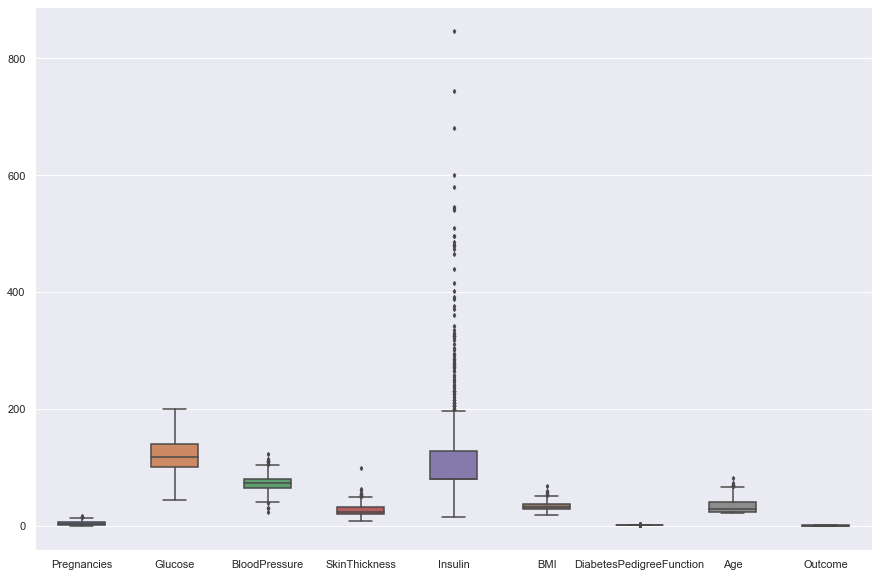

In [11]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

In [12]:
q = data['Pregnancies'].quantile(0.98)
# we are removing top 2% data from Pregnencies column

data_cleaned = data[data['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# we are removing top 1% data from the BMI column
data_cleaned = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]



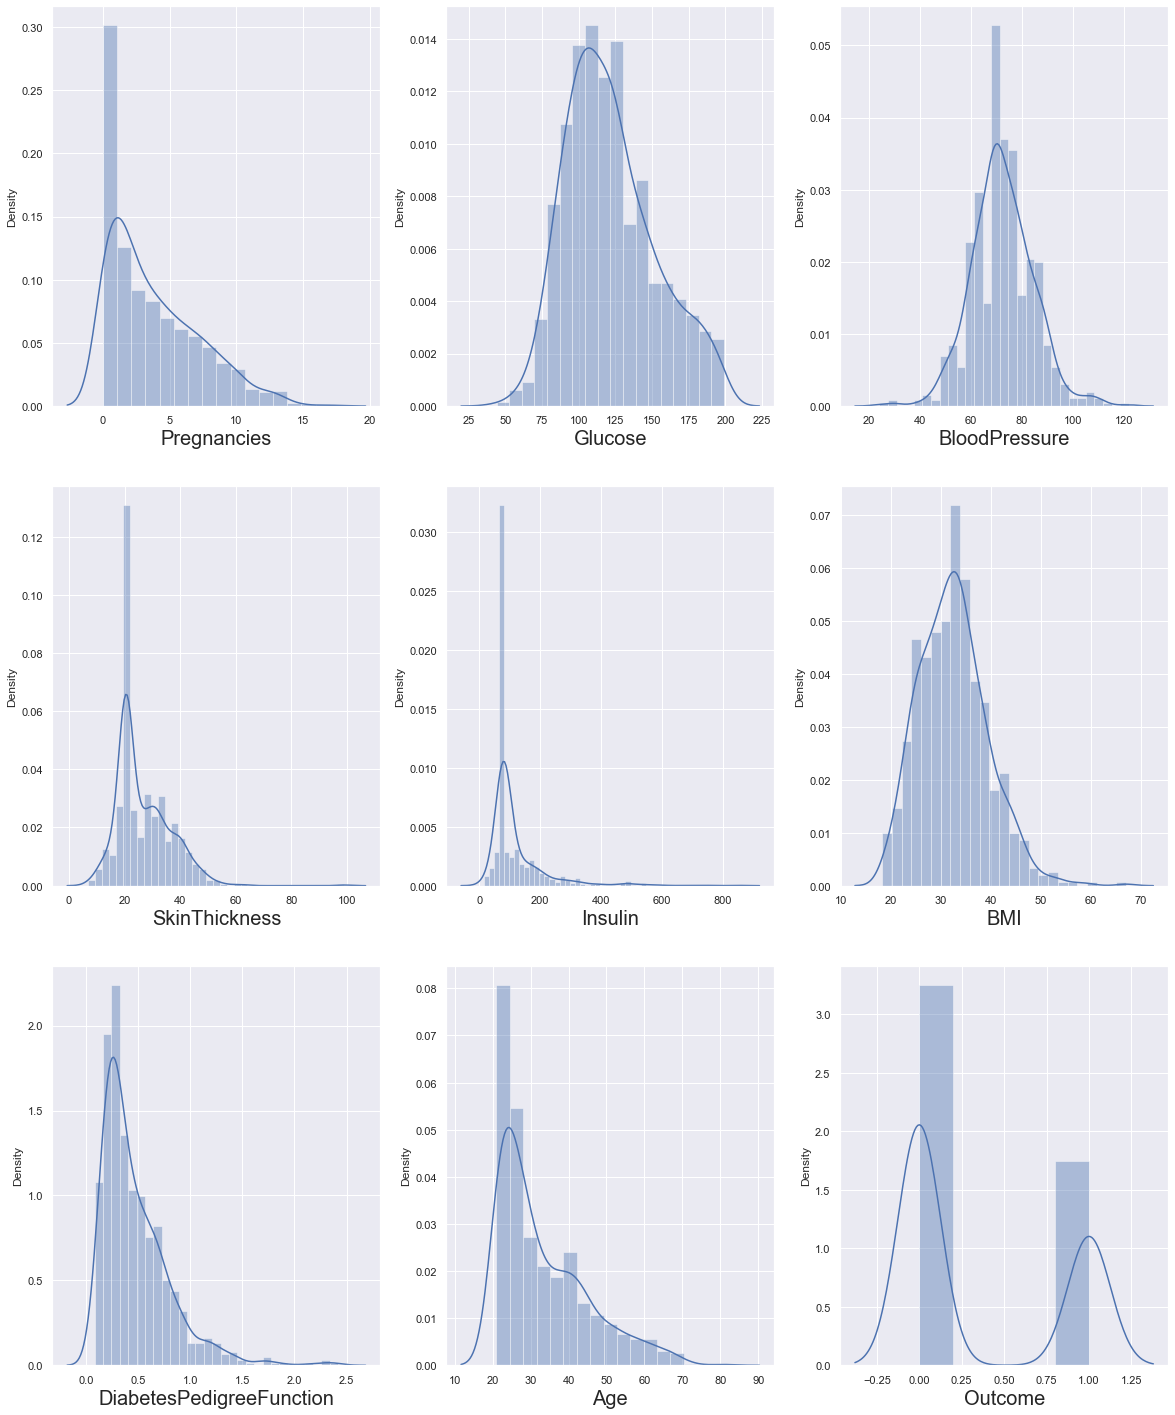

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 9:   # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.show()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information.
If our model doesn't work with accuracy, we will come back for more preprocessing.


### dependent and independent column

In [17]:
X = data_cleaned.drop(columns=['Outcome'])
y = data_cleaned['Outcome']

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

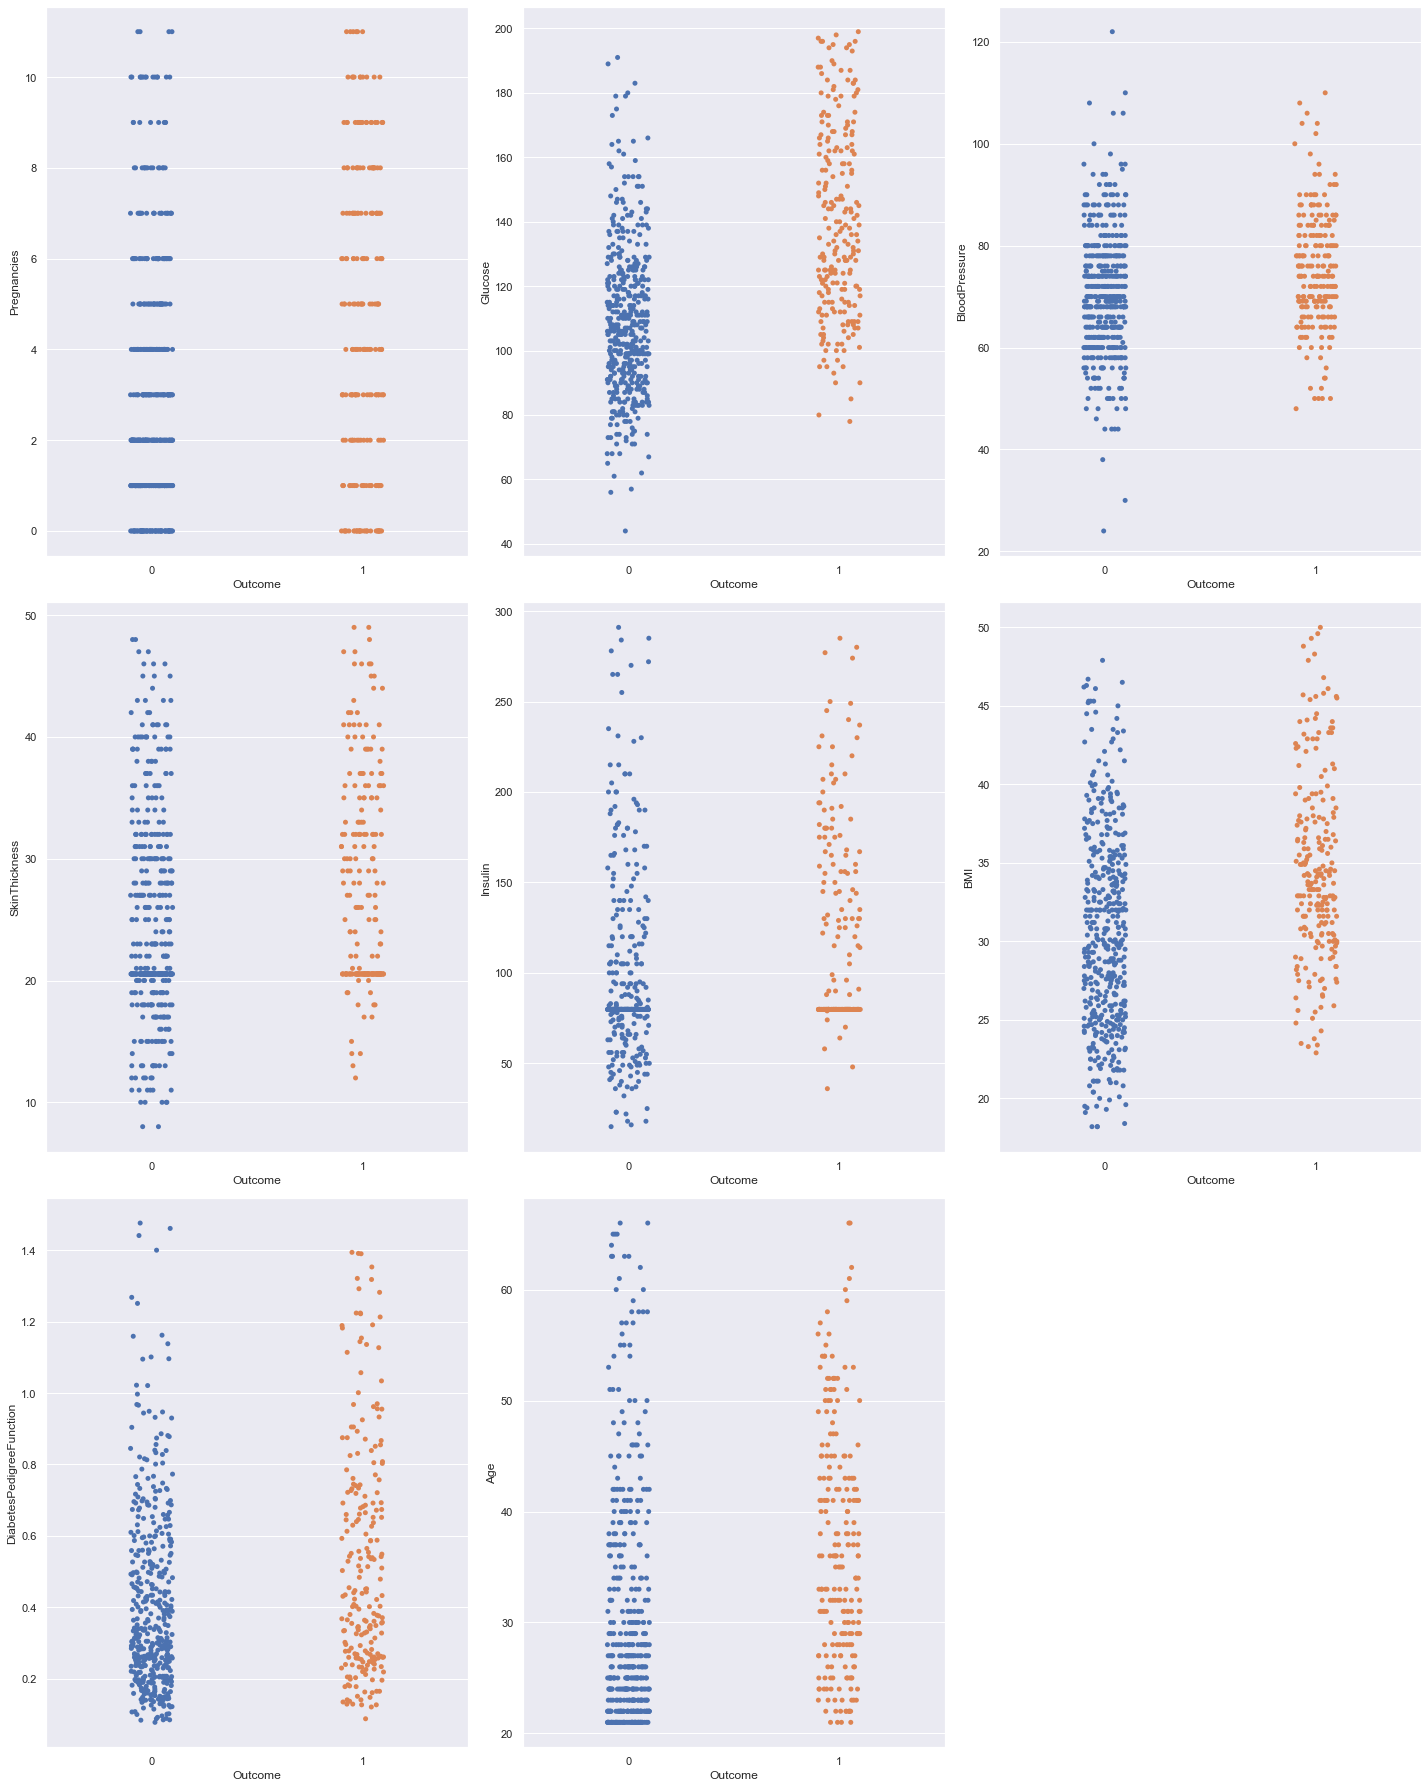

In [18]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber <= 9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y, X[column])
    plotnumber +=1
plt.tight_layout()

### standardization of data

In [19]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [20]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

# let's check the values
vif

,vif,Features
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.25, random_state=355)

### Model Building

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

### saving the model file

In [25]:
import pickle
# writting different model files to file
with open('modelLogisticPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('standardScaler_log.sav','wb') as f:
    pickle.dump(scalar, f)


Let's see how well our model performs on the test data set.

In [26]:
y_pred = log_reg.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.834319526627219


### confusin matrix

In [28]:
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[109   8]
 [ 20  32]]


In [29]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [30]:
# breaking down the formula for accuracy

Accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_negative + false_positive)

print(Accuracy)

0.834319526627219


In [31]:
# precision

Precision = (true_positive)/ (true_positive + false_positive) 

print(Precision)

0.9316239316239316


In [32]:
# recall

Recall = (true_positive) / (true_positive + false_negative)

print(Recall)

0.8449612403100775


In [33]:
## F1 score

F1_score = 2*(Precision * Recall) / (Precision + Recall)
print(F1_score)

0.8861788617886178
